In [15]:
import numpy
import matplotlib.pyplot as plt
from scipy import optimize, stats
import pandas
import sys
sys.path.insert(0,'/home/leo/Documents/cosmic_ray_generator/api')
import functions

A simple function for copying data over from the spreadsheet

In [ ]:
def inp():
    a=[[],[]]
    p=input('p')
    I=input('intensity')
    for i in p.split(' '):
        a[0].append(float(i))
    for i in I.split(' '):
        a[1].append(float(i))
    return a

Prepare data for plotting

In [4]:
def plot(data):
    x=numpy.array(data[0])
    y=numpy.array(data[1])
    return [x,y]

In [4]:
tsuji1=inp()
tsuji2=inp()
tsuji3=inp()

A set of 3 functions to perform a least squares fit of the cos^n function

In [5]:
def test_distr(x,params):
    a,b=params[0],params[1]
    return a*(numpy.cos(numpy.deg2rad(x))**b)

In [6]:
def res(params,x,y):
    return y-test_distr(x,params)

In [7]:
def fit(data):
    popt=optimize.leastsq(res,x0=numpy.array([1,2]),args=(data[0],data[1]))
    print(popt)
    return(popt[0])

A set of functions to perform a least squares fit to the theoretical model

In [8]:
def exp(a,x,y,E):
    return y-a*functions.theory_supressed(E_mu=E,theta=numpy.deg2rad(x))

In [9]:
def expfit(data,E):
    popt=optimize.least_squares(exp,x0=[1.],args=[data[0],data[1],E])
    return popt['x'][0]

In [20]:
def expcos(params,x,y):
    a,n=params
    return y-a*numpy.cos(numpy.deg2rad(x))**n

In [23]:
def cosfit(data):
    popt=optimize.least_squares(expcos,x0=[1,2],args=[data[0],data[1]])
    return popt['x']

Reading generator data from a saved numpy array

In [16]:
with open("gen_data_angle.npy",'rb') as file:
    c=numpy.load(file)
c=[[c[i][0] for i in range(len(c))],[c[i][1] for i in range(len(c))]]

In [24]:
cosfit([c[1],c[0]])

array([1.81554135e+04, 1.51356638e+00])

Generate plot of various fitting attempts against experimental data

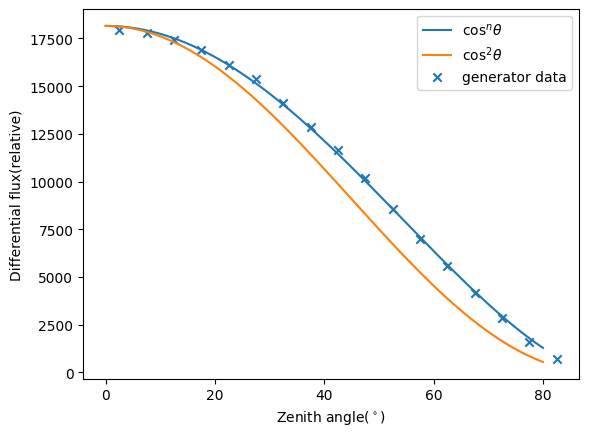

In [27]:
x=numpy.linspace(0,80,100000)
# c2=[x,numpy.cos(numpy.deg2rad(x))**2]
# xfit=numpy.array(functions.theory_supressed(E_mu=22.5, theta=numpy.deg2rad(tsuji2[0])))
# plt.plot(x, expfit(tsuji1,12.5)*functions.theory_supressed(E_mu=12.5, theta=numpy.deg2rad(x)), label='12.5GeV, theo.')
# plt.plot(x, (numpy.sum(tsuji2[1])/numpy.sum(xfit))*functions.theory_supressed(E_mu=22.5, theta=numpy.deg2rad(x)), label='22.5GeV, theo.', color='m')
# plt.plot(x, expfit(tsuji3,45)*functions.theory_supressed(E_mu=45, theta=numpy.deg2rad(x)), label='45GeV, theo.')
# plt.plot(x, cosfit(tsuji1)*(numpy.cos(numpy.deg2rad(x))**2),label='cos-squared')
# plt.scatter(tsuji1[0],numpy.array(tsuji1[1]), label='12.5GeV', marker='x')
f2=cosfit([c[1],c[0]])
plt.plot(x,f2[0]*numpy.cos(numpy.deg2rad(x))**f2[1], label='cos$^n\\theta$')
plt.plot(x,f2[0]*numpy.cos(numpy.deg2rad(x))**2, label='cos$^2\\theta$')
plt.scatter(c[1], numpy.array(c[0]), marker='x',label='generator data')
# xfit=numpy.array(numpy.cos(numpy.deg2rad(tsuji2[0]))**2)
# plt.plot(x, (numpy.sum(tsuji2[1])/numpy.sum(xfit))*numpy.array(c2[1]), label='$cos^2\\theta$, same total', color='g')
# plt.plot(x, 2*10**-5*numpy.array(c2[1]), label='$cos^2\\theta$, normalized', color='r')
# plt.scatter(tsuji2[0],numpy.array(tsuji2[1]), label='22.5GeV, Tsuji et al.', marker='x')
# plt.scatter(tsuji3[0],numpy.array(tsuji3[1]), label='45.0GeV', marker='x')
plt.xlabel('Zenith angle($^\circ$)')
plt.ylabel('Differential flux(relative)')
plt.legend()